In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import requests
%matplotlib inline


In [2]:
res = requests.get('http://api-pokemon-baron.herokuapp.com/pokemon')

In [3]:
json_data = res.json()

dfPokemon = pd.DataFrame(json_data, columns = json_data[0].keys())
dfPokemon.head()

,id,Name,Type 1,Type 2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
0,1,Bulbasaur,Grass,Poison,318,45,49,49,65,65,45,1,False
1,2,Ivysaur,Grass,Poison,405,60,62,63,80,80,60,1,False
2,3,Venusaur,Grass,Poison,525,80,82,83,100,100,80,1,False
3,3,VenusaurMega Venusaur,Grass,Poison,625,80,100,123,122,120,80,1,False
4,4,Charmander,Fire,Normal,309,39,52,43,60,50,65,1,False


In [39]:
pd.cut(dfPokemon['Attack'], bins = 5)

0        (42.0, 79.0]
1        (42.0, 79.0]
2       (79.0, 116.0]
3       (79.0, 116.0]
4        (42.0, 79.0]
5        (42.0, 79.0]
6       (79.0, 116.0]
7      (116.0, 153.0]
8       (79.0, 116.0]
9        (42.0, 79.0]
10       (42.0, 79.0]
11      (79.0, 116.0]
12      (79.0, 116.0]
13      (4.815, 42.0]
14      (4.815, 42.0]
15       (42.0, 79.0]
16      (4.815, 42.0]
17      (4.815, 42.0]
18      (79.0, 116.0]
19     (116.0, 153.0]
20       (42.0, 79.0]
21       (42.0, 79.0]
22      (79.0, 116.0]
23      (79.0, 116.0]
24       (42.0, 79.0]
25      (79.0, 116.0]
26       (42.0, 79.0]
27      (79.0, 116.0]
28       (42.0, 79.0]
29      (79.0, 116.0]
            ...      
770      (42.0, 79.0]
771     (79.0, 116.0]
772      (42.0, 79.0]
773      (42.0, 79.0]
774      (42.0, 79.0]
775      (42.0, 79.0]
776     (79.0, 116.0]
777     (79.0, 116.0]
778      (42.0, 79.0]
779     (79.0, 116.0]
780      (42.0, 79.0]
781      (42.0, 79.0]
782      (42.0, 79.0]
783      (42.0, 79.0]
784     (7

In [28]:
from category_encoders import HashingEncoder

In [31]:
from sklearn.datasets import load_boston
bunch = load_boston()
X = pd.DataFrame(bunch.data, columns=bunch.feature_names)
y = bunch.target
he = HashingEncoder(cols=['CHAS', 'RAD'], hash_method = 'sha1').fit(X, y)
data = he.transform(X)
print(data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 13 columns):
CRIM       506 non-null float64
ZN         506 non-null float64
INDUS      506 non-null float64
CHAS       506 non-null float64
NOX        506 non-null float64
RM         506 non-null float64
AGE        506 non-null float64
DIS        506 non-null float64
RAD        506 non-null float64
TAX        506 non-null float64
PTRATIO    506 non-null float64
B          506 non-null float64
LSTAT      506 non-null float64
dtypes: float64(13)
memory usage: 51.5 KB
None


In [19]:
hasher = ce.HashingEncoder()
hasher.fit(X = dfPokemon.drop('Legendary', axis = 1), y = dfPokemon['Legendary'])

HashingEncoder(cols=['Name', 'Type 1', 'Type 2'], drop_invariant=False,
               hash_method='md5', max_process=6, max_sample=133, n_components=8,
               return_df=True, verbose=0)

In [20]:
hasher.transform(X = dfPokemon.drop('Legendary', axis = 1))

,id,Name,Type 1,Type 2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation
0,1,Bulbasaur,Grass,Poison,318,45,49,49,65,65,45,1
1,2,Ivysaur,Grass,Poison,405,60,62,63,80,80,60,1
2,3,Venusaur,Grass,Poison,525,80,82,83,100,100,80,1
3,3,VenusaurMega Venusaur,Grass,Poison,625,80,100,123,122,120,80,1
4,4,Charmander,Fire,Normal,309,39,52,43,60,50,65,1
5,5,Charmeleon,Fire,Poison,405,58,64,58,80,65,80,1
6,6,Charizard,Fire,Flying,534,78,84,78,109,85,100,1
7,6,CharizardMega Charizard X,Fire,Dragon,634,78,130,111,130,85,100,1
8,6,CharizardMega Charizard Y,Fire,Flying,634,78,104,78,159,115,100,1
9,7,Squirtle,Water,Rock,314,44,48,65,50,64,43,1


,id,Name,Type 1,Type 2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation
0,1,Bulbasaur,Grass,Poison,318,45,49,49,65,65,45,1
1,2,Ivysaur,Grass,Poison,405,60,62,63,80,80,60,1
2,3,Venusaur,Grass,Poison,525,80,82,83,100,100,80,1
3,3,VenusaurMega Venusaur,Grass,Poison,625,80,100,123,122,120,80,1
4,4,Charmander,Fire,Normal,309,39,52,43,60,50,65,1
5,5,Charmeleon,Fire,Poison,405,58,64,58,80,65,80,1
6,6,Charizard,Fire,Flying,534,78,84,78,109,85,100,1
7,6,CharizardMega Charizard X,Fire,Dragon,634,78,130,111,130,85,100,1
8,6,CharizardMega Charizard Y,Fire,Flying,634,78,104,78,159,115,100,1
9,7,Squirtle,Water,Rock,314,44,48,65,50,64,43,1


In [4]:
dfPokemon.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 800 entries, 0 to 799
Data columns (total 13 columns):
id            800 non-null int64
Name          800 non-null object
Type 1        800 non-null object
Type 2        800 non-null object
Total         800 non-null int64
HP            800 non-null int64
Attack        800 non-null int64
Defense       800 non-null int64
Sp. Atk       800 non-null int64
Sp. Def       800 non-null int64
Speed         800 non-null int64
Generation    800 non-null int64
Legendary     800 non-null object
dtypes: int64(9), object(4)
memory usage: 81.3+ KB


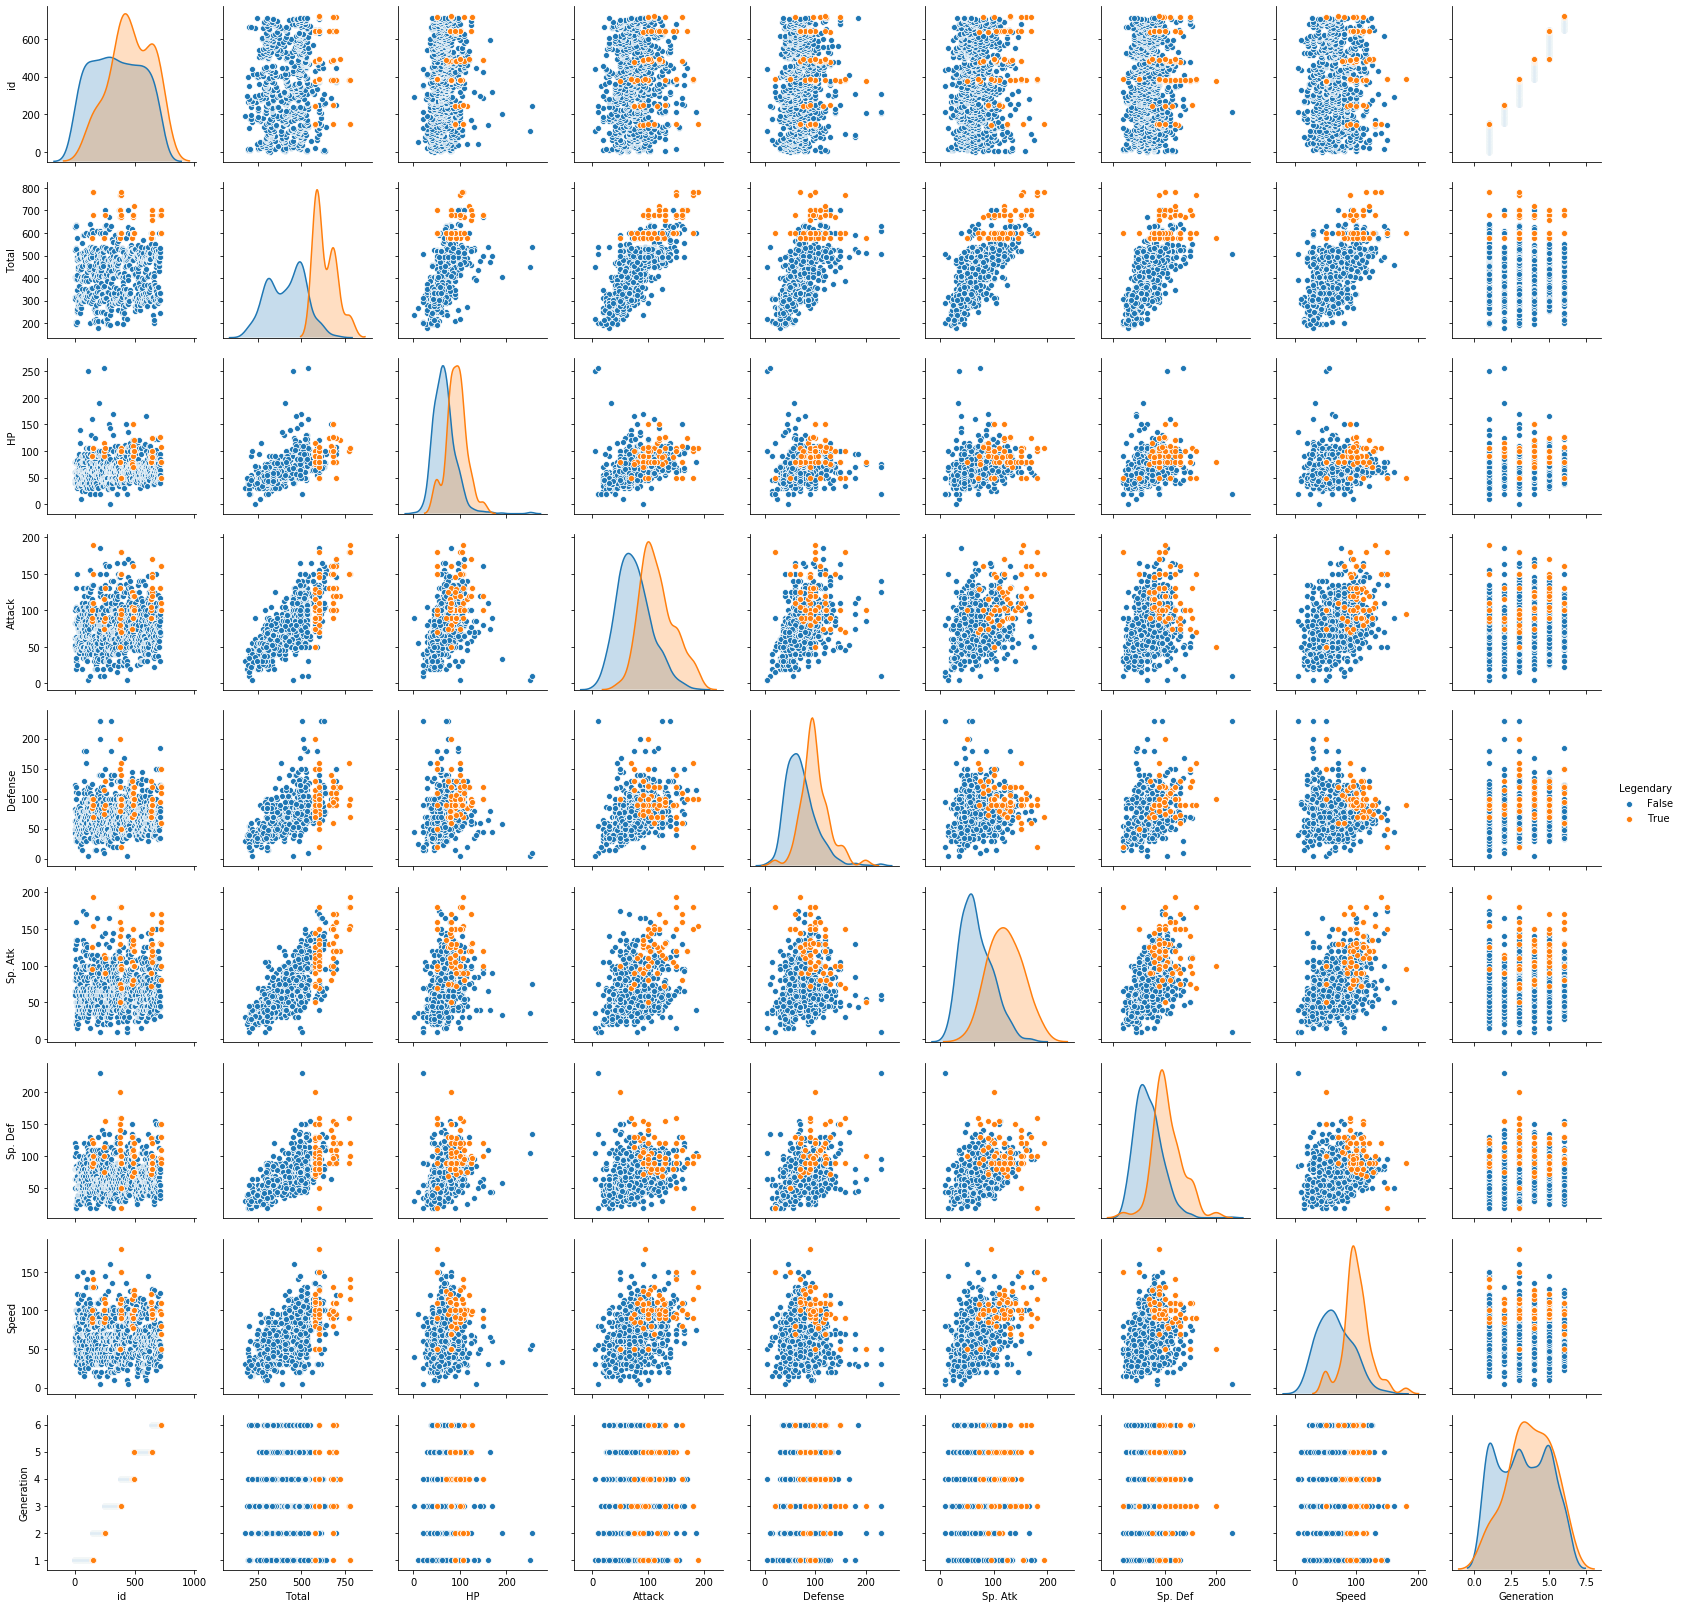

In [5]:
sns.pairplot(dfPokemon, hue = 'Legendary')

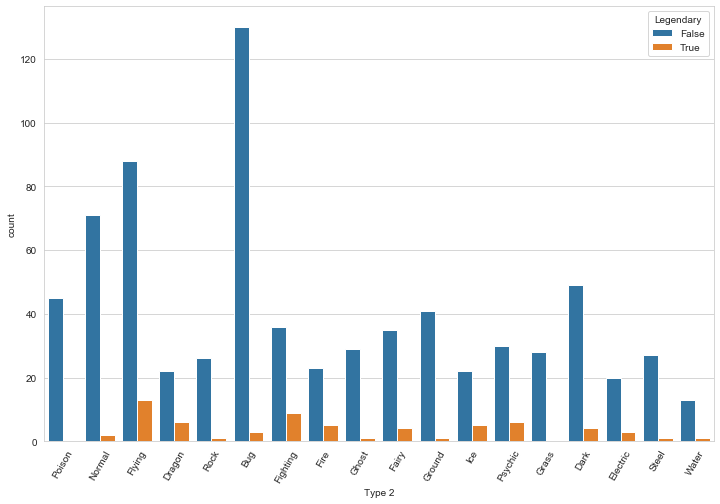

In [6]:
plt.figure(figsize= (12,8))
sns.set_style('whitegrid')
plt.xticks(rotation = 60)
sns.countplot(x='Type 2', data =dfPokemon, hue ='Legendary')

In [7]:
from sklearn.preprocessing import LabelEncoder

In [8]:
le = LabelEncoder()
# dfPokemon['Type 1'] = le.fit_transform(dfPokemon['Type 1'])
# dfPokemon['Type 2'] = le.fit_transform(dfPokemon['Type 2'])

In [9]:
le1 = LabelEncoder()
le2 = LabelEncoder()

le1.fit(dfPokemon['Type 1'])
le2.fit(dfPokemon['Type 2'])

LabelEncoder()

In [10]:
le2.transform(['Poison'])

array([13], dtype=int64)

In [11]:
import pickle
pickle.dump(le1, open('le_type1.sav', 'wb'))
pickle.dump(le2, open('le_type2.sav', 'wb'))

In [12]:
dfPokemon['Type 1'] = le1.fit_transform(dfPokemon['Type 1'])
dfPokemon['Type 2'] = le2.fit_transform(dfPokemon['Type 2'])

In [13]:
dfPokemon['Legendary'] = dfPokemon['Legendary'].apply(lambda x: 1 if x == 'True' else 0)

In [14]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier

In [15]:
X_train, X_test, y_train, y_test = train_test_split(dfPokemon.drop(['Legendary', 'id', 'Name'], axis =1), dfPokemon['Legendary'], test_size = 0.3, random_state =101)
rfc = RandomForestClassifier(n_estimators = 100, random_state = 101)

In [16]:
rfc.fit(X_train, y_train)
predict = rfc.predict(X_test)

In [17]:
from sklearn.metrics import confusion_matrix, classification_report, roc_auc_score, roc_curve, auc

In [18]:
print(confusion_matrix(y_test, predict))
print(classification_report(y_test, predict))

[[216   3]
 [ 10  11]]
              precision    recall  f1-score   support

           0       0.96      0.99      0.97       219
           1       0.79      0.52      0.63        21

    accuracy                           0.95       240
   macro avg       0.87      0.76      0.80       240
weighted avg       0.94      0.95      0.94       240



In [19]:
PredictProb = rfc.predict_proba(X_test)

In [20]:
predictions = []
for prob in PredictProb[:, 1]:
    if(prob > 0.15):
        predictions.append(1)
    else:
        predictions.append(0)

In [21]:
print(confusion_matrix(y_test, predictions))
print(classification_report(y_test, predictions))

[[203  16]
 [  0  21]]
              precision    recall  f1-score   support

           0       1.00      0.93      0.96       219
           1       0.57      1.00      0.72        21

    accuracy                           0.93       240
   macro avg       0.78      0.96      0.84       240
weighted avg       0.96      0.93      0.94       240



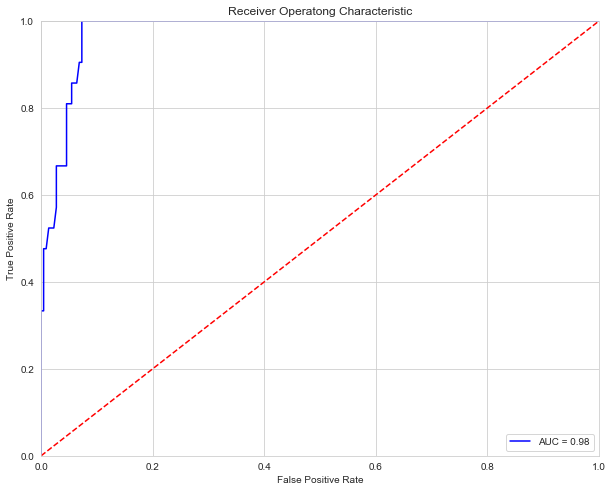

In [22]:

preds = PredictProb[:,1]
fpr, tpr, threshold = roc_curve(y_test, preds)
roc_auc = auc(fpr, tpr)

import matplotlib.pyplot as plt
plt.figure(figsize=(10,8))
plt.title('Receiver Operatong Characteristic')
plt.plot(fpr, tpr, 'b', label = 'AUC = {}'.format(round(roc_auc, 2)))
plt.legend(loc = 'lower right')
plt.plot([0,1], [0,1], 'r--')
plt.xlim([0,1])
plt.ylim([0,1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

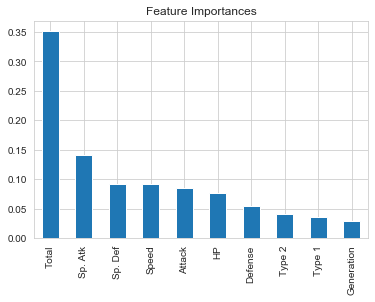

In [23]:
coef1 = pd.Series(rfc.feature_importances_, X_train.columns).sort_values(ascending = False)
coef1.plot(kind = 'bar', title ='Feature Importances')

In [24]:
rfc = RandomForestClassifier(n_estimators = 100, random_state = 101)
rfc.fit(dfPokemon.drop(['id', 'Name', 'Legendary'], axis =1), dfPokemon['Legendary'])

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=None, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=101,
                       verbose=0, warm_start=False)

In [25]:
import pickle
filename = 'rfc_pokemon.sav'
pickle.dump(rfc, open(filename, 'wb'))

## XGboost Testing

In [26]:
from xgboost import XGBClassifier

In [27]:
xgb = XGBClassifier(random_state = 101, learning_rate = 0.1)

In [28]:
xgb.fit(X_train, y_train)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0,
              learning_rate=0.1, max_delta_step=0, max_depth=3,
              min_child_weight=1, missing=None, n_estimators=100, n_jobs=1,
              nthread=None, objective='binary:logistic', random_state=101,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
              silent=None, subsample=1, verbosity=1)

In [29]:
predictions = xgb.predict(X_test)
predictProb = xgb.predict_proba(X_test)

In [30]:
predictions = []
for prob in predictProb[:, 1]:
    if(prob >0.15):
        predictions.append(1)
    else:
        predictions.append(0)

In [31]:
print(confusion_matrix(y_test, predictions))
print(classification_report(y_test, predictions))

[[205  14]
 [  4  17]]
              precision    recall  f1-score   support

           0       0.98      0.94      0.96       219
           1       0.55      0.81      0.65        21

    accuracy                           0.93       240
   macro avg       0.76      0.87      0.81       240
weighted avg       0.94      0.93      0.93       240



## Deep Learning Testing

In [32]:
y_traindl = pd.get_dummies(columns='Legendary', data = y_train)
y_traindl.head()

,0,1
332,1,0
572,1,0
58,1,0
474,1,0
16,1,0


In [33]:
y_testdl = pd.get_dummies(columns='Legendary', data = y_test)
y_testdl.head()

,0,1
127,1,0
684,1,0
288,1,0
458,1,0
530,1,0


In [34]:
sum(y_traindl[1])

44

In [35]:
sum(y_traindl[0])

516

In [37]:
import keras
from keras.layers import Dense
from keras.models import Sequential, load_model
from keras.callbacks import ModelCheckpoint

Using TensorFlow backend.
ERROR:root:Internal Python error in the inspect module.
Below is the traceback from this internal error.



Traceback (most recent call last):
  File "C:\Users\MSI\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py", line 3325, in run_code
    exec(code_obj, self.user_global_ns, self.user_ns)
  File "<ipython-input-37-f59d418b813a>", line 1, in <module>
    import keras
  File "C:\Users\MSI\Anaconda3\lib\site-packages\keras\__init__.py", line 3, in <module>
    from . import utils
  File "C:\Users\MSI\Anaconda3\lib\site-packages\keras\utils\__init__.py", line 6, in <module>
    from . import conv_utils
  File "C:\Users\MSI\Anaconda3\lib\site-packages\keras\utils\conv_utils.py", line 9, in <module>
    from .. import backend as K
  File "C:\Users\MSI\Anaconda3\lib\site-packages\keras\backend\__init__.py", line 1, in <module>
    from .load_backend import epsilon
  File "C:\Users\MSI\Anaconda3\lib\site-packages\keras\backend\load_backend.py", line 90, in <module>
    from .tensorflow_backend import *
  File "C:\Users\MSI\Anaconda3\lib\site-packages\keras\backend\tensorflow_backend.py

ImportError: cannot import name 'descriptor' from 'google.protobuf' (unknown location)

In [ ]:
model = Sequential()
#The Input Layer
model.add(Dense(128, kernel_initializer ='normal', input_dim = X_train.shape[1], activation = 'relu'))

#The Hidden Layers:
model.add(Dense(256, kernel_initializer = 'normal', activation = 'relu'))
model.add(Dense(256, kernel_initializer = 'normal', activation = 'relu'))
model.add(Dense(256, kernel_initializer = 'normal', activation = 'relu'))

#The Output Layer
model.add(Dense(2, kernel_initializer ='normal', activation ='softmax'))

#Compile the network
model.compile(loss='categorical_crossentropy', optimizer ='adam', metrics=['accuracy'])
model.summary()

In [ ]:
from keras.callbacks import ModelCheckpoint, EarlyStopping

checkpoint_name = 'Weights-{epoch:03d}--{val_loss:.5f}.hdf5'
checkpoint = ModelCheckpoint(checkpoint_name, monitor ='val_loss', verbose = 1, save_best_only = True, mode='auto')

early_stop = EarlyStopping(patience = 3)

callbacks_list = [checkpoint, early_stop]

In [ ]:
model.metrics_names

In [ ]:
model.evaluate(X_test, y_test)

In [ ]:
fitresults = model.fit(X, y, epochs = 10, batch_size =32, validation_split = 0.2, callbacks = callbacks_list)

In [ ]:
fitresults.history.keys()

In [ ]:
plt.figure(figsize = (12, 8))
plt.plot(fitresults.epoch, fitresults.history['acc'], label = 'Train')
plt.plot(fitresults.epoch, fitresults.history['val_acc'], label ='Validation')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

In [38]:
weights_file = 'Weights-001--1.43912.hdf5'
model.load_weights(weights_file)
model.compile(loss='categorical_crossentropy', optimizer ='adam', metrics=['accuracy'])

ERROR:root:Internal Python error in the inspect module.
Below is the traceback from this internal error.



Traceback (most recent call last):
  File "C:\Users\MSI\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py", line 3325, in run_code
    exec(code_obj, self.user_global_ns, self.user_ns)
  File "<ipython-input-38-687cb4153af5>", line 2, in <module>
    model.load_weights(weights_file)
NameError: name 'model' is not defined

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "C:\Users\MSI\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py", line 2039, in showtraceback
    stb = value._render_traceback_()
AttributeError: 'NameError' object has no attribute '_render_traceback_'

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "C:\Users\MSI\Anaconda3\lib\site-packages\IPython\core\ultratb.py", line 1101, in get_records
    return _fixed_getinnerframes(etb, number_of_lines_of_context, tb_offset)
  File "C:\Users\MSI\Anaconda3\lib\site-packages\IPython

NameError: name 'model' is not defined

In [ ]:
model.save('dlm_pokemon.h5')

In [ ]:
dlm = load_model('dlm_pokemon.h5')

In [ ]:
predictions = dlm.predict(X_train)
predProb = dlm.predict_proba(X_train)

In [ ]:
prediction = []

for i in predictions[:, 1]:
    if i < 0.15:
        pre

In [ ]:
print(classification_report(y_train, predictions.reshape(560)))